In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
column_names = ['A', 'B', 'C', 'Label']

raw_dataset = pd.read_csv('../Datasets/Sheet1.csv')

In [3]:
dataset = raw_dataset.copy()
dataset

,A,B,C,Label
0,-2.0,-3.0,-4.0,-6.0
1,-1.0,-2.0,-3.0,-6.0
2,0.0,-1.0,-2.0,-4.0
3,1.0,0.0,-1.0,0.0
4,2.0,1.0,0.0,6.0
5,3.0,2.0,1.0,14.0
6,4.0,3.0,2.0,24.0
7,5.0,4.0,3.0,36.0
8,6.0,5.0,4.0,50.0
9,7.0,6.0,5.0,66.0


In [4]:
dataset.isna().sum()

A        0
B        0
C        0
Label    0
dtype: int64

In [5]:
dataset = dataset.dropna()

In [6]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

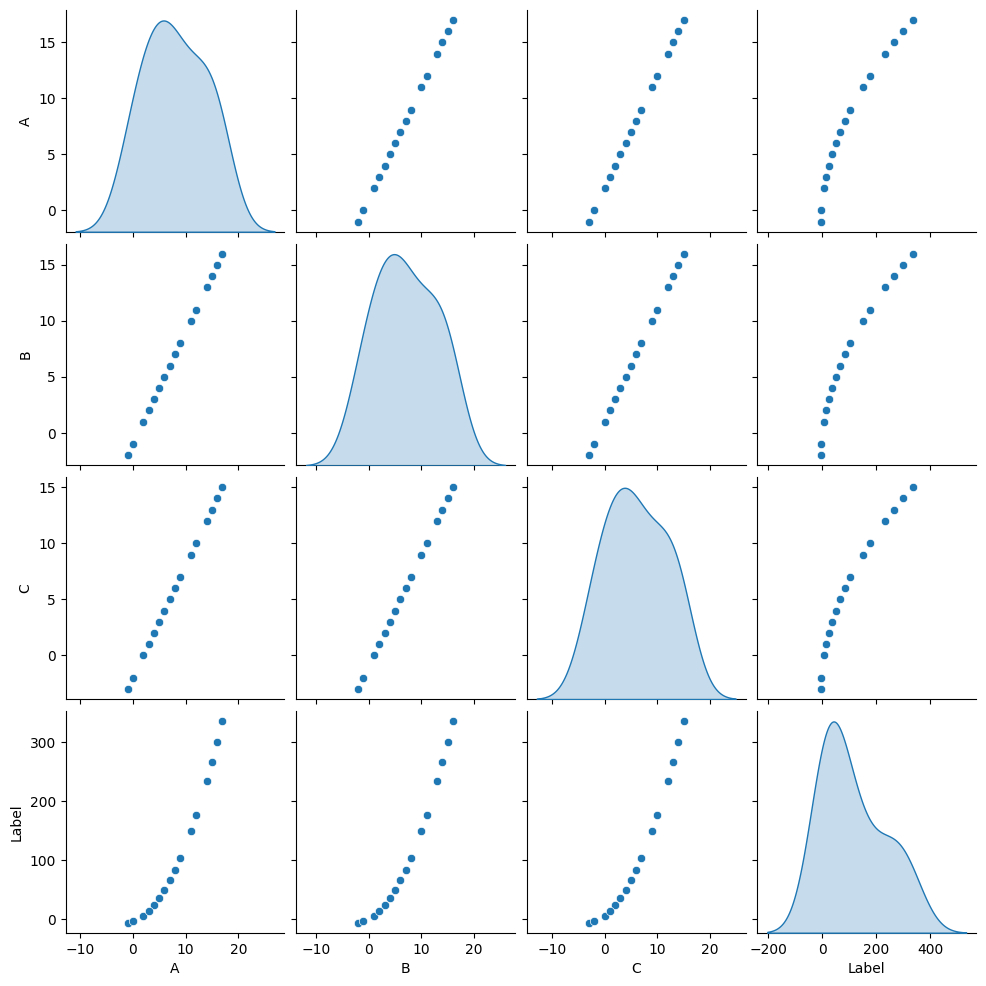

In [7]:
sns.pairplot(train_dataset[['A', 'B', 'C', 'Label']], diag_kind='kde')

In [8]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
A,16.0,8.00,5.727128,-1.0,3.75,7.5,12.5,17.0
B,16.0,7.00,5.727128,-2.0,2.75,6.5,11.5,16.0
C,16.0,6.00,5.727128,-3.0,1.75,5.5,10.5,15.0
Label,16.0,114.75,114.916491,-6.0,21.50,75.0,190.5,336.0


In [9]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Label')
test_labels = test_features.pop('Label')

In [10]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
A,8.00,5.727128
B,7.00,5.727128
C,6.00,5.727128
Label,114.75,114.916491


In [11]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [12]:
normalizer.adapt(np.array(train_features))

In [13]:
print(normalizer.mean.numpy())

[[8. 7. 6.]]


In [14]:
model = keras.Sequential([
      normalizer,
      layers.Dense(512, activation='relu'),
      layers.Dense(512, activation='relu'),
      layers.Dense(1)
  ])

model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.0001))

In [15]:
model.fit(train_features, train_labels, epochs = 1000)

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 115.9331
Epoch 2/1000
1/1 [==============================] - 0s 7ms/step - loss: 115.9125
Epoch 3/1000
1/1 [==============================] - 0s 8ms/step - loss: 115.8922
Epoch 4/1000
1/1 [==============================] - 0s 9ms/step - loss: 115.8720
Epoch 5/1000
1/1 [==============================] - 0s 8ms/step - loss: 115.8521
Epoch 6/1000
1/1 [==============================] - 0s 7ms/step - loss: 115.8323
Epoch 7/1000
1/1 [==============================] - 0s 8ms/step - loss: 115.8126
Epoch 8/1000
1/1 [==============================] - 0s 9ms/step - loss: 115.7931
Epoch 9/1000
1/1 [==============================] - 0s 8ms/step - loss: 115.7738
Epoch 10/1000
1/1 [==============================] - 0s 9ms/step - loss: 115.7546
Epoch 11/1000
1/1 [==============================] - 0s 9ms/step - loss: 115.7353
Epoch 12/1000
1/1 [==============================] - 0s 9ms/step - loss: 115.7162
Epoch 13/1000
1/1 [=======

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 3)                7         
 n)                                                              
                                                                 
 dense (Dense)               (None, 512)               2048      
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 1)                 513       
                                                                 
Total params: 265,224
Trainable params: 265,217
Non-trainable params: 7
_________________________________________________________________


In [17]:
model.predict([3,2,1])

1/1 [==============================] - 0s 115ms/step


array([[13.944869]], dtype=float32)

In [18]:
model.save("../Models/Act4.h5")